In [1]:
library("factoextra")
options(repr.plot.width=12, repr.plot.height=13)

Loading required package: ggplot2
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


In [2]:
path="C:/Users/Jordi/New_Jupyter/"
setwd(path)
mydata = read.csv("threads_ideal_data_partial_sp_cl+listR.csv", sep=";")
unique(mydata[,"comp_opt"])

[1] O2
Levels: O2

In [3]:
colnames(mydata)

[1] "id"           "size_vector"  "comp_opt"     "label"        "threads"     
 [6] "PAPI_L1_DCM"  "PAPI_L3_TCM"  "PAPI_TOT_INS" "PAPI_REF_CYC" "PAPI_L2_LDM" 
[11] "PAPI_SR_INS"  "time_x"       "PAPI_BR_UCN"  "PAPI_BR_CN"   "PAPI_BR_TKN" 
[16] "PAPI_BR_MSP"  "time_y"       "PAPI_FP_OPS"  "PAPI_L1_LDM"  "PAPI_L1_STM" 
[21] "time_x.1"     "PAPI_SP_OPS"  "PAPI_LD_INS"  "PAPI_L2_STM"  "time_y.1"    
[26] "PAPI_TLB_DM"  "PAPI_L2_DCH"  "time"         "time_log"     "P_index"     
[31] "ideal"        "affinity"     "T_list"       "P_list"

In [4]:
library(stringr)
colnames(mydata)<-gsub(x = names(mydata), pattern = "\\.", replacement = "_" )

In [5]:
#colnames(mydata)

In [6]:
mydata = mydata[mydata$affinity == 'close',]

mydata_no_time <- subset(mydata, select = -c(P_list))
mydata_no_time <- subset(mydata_no_time, select = -c(T_list))
mydata_no_time <- subset(mydata_no_time, select = -c(ideal))
mydata_no_time <- subset(mydata_no_time, select = -c(P_index))
mydata_no_time <- subset(mydata_no_time, select = -c(time_log))
mydata_no_time <- subset(mydata_no_time, select = -c(time))
mydata_no_time <- subset(mydata_no_time, select = -c(time_y_1))
mydata_no_time <- subset(mydata_no_time, select = -c(time_x_1))
mydata_no_time <- subset(mydata_no_time, select = -c(time_x))
mydata_no_time <- subset(mydata_no_time, select = -c(time_y))
mydata_no_time <- subset(mydata_no_time, select = -c(affinity))




mydata_no_time <- subset(mydata_no_time, select = -c(PAPI_SP_OPS))



In [7]:
colnames(mydata_no_time)

[1] "id"           "size_vector"  "comp_opt"     "label"        "threads"     
 [6] "PAPI_L1_DCM"  "PAPI_L3_TCM"  "PAPI_TOT_INS" "PAPI_REF_CYC" "PAPI_L2_LDM" 
[11] "PAPI_SR_INS"  "PAPI_BR_UCN"  "PAPI_BR_CN"   "PAPI_BR_TKN"  "PAPI_BR_MSP" 
[16] "PAPI_FP_OPS"  "PAPI_L1_LDM"  "PAPI_L1_STM"  "PAPI_LD_INS"  "PAPI_L2_STM" 
[21] "PAPI_TLB_DM"  "PAPI_L2_DCH"

In [8]:
#mydata = mydata[mydata$comp_opt != 'NF',]
#mydata = mydata[mydata$comp_opt != 'O1',]
#mydata = mydata[mydata$label != '2D4PStencil_E',]
#mydata = mydata[mydata$label != 'Reduction_E',]
#mydata = mydata[mydata$label != '2PStencil_E',]

#head(mydata)
#unique(mydata[,"comp_opt"])

In [9]:
#head(mydata)

In [10]:
dfu <- unique(mydata_no_time$size_vector)
#dfu[order(dfu)]

comprss <- function(tx) { 
      div <- findInterval(as.numeric(gsub("\\,", "", tx)), 
                          c(1, 1e3, 1e6, 1e9, 1e12) )
      paste(round( as.numeric(gsub("\\,","",tx))/10^(3*(div-1)), 2), 
           c("","K","M","B","T")[div] )}
comprss(dfu[order(dfu)])



[1] "1 K"   "2 K"   "3 K"   "4 K"   "5 K"   "6 K"   "7 K"   "8 K"   "9 K"  
[10] "10 K"  "20 K"  "30 K"  "40 K"  "50 K"  "60 K"  "70 K"  "80 K"  "90 K" 
[19] "100 K" "200 K" "300 K" "400 K" "500 K" "600 K" "700 K" "800 K" "900 K"
[28] "1 M"   "2 M"   "3 M"   "5 M"   "7 M"   "9 M"   "20 M"  "40 M"  "60 M" 
[37] "80 M"  "100 M" "120 M" "140 M" "160 M" "180 M" "200 M"

In [11]:
#print(new_mydata[,c("PAPI_VEC_SP","PAPI_VEC_DP")])
#print(mydata[,c("PAPI_VEC_SP","PAPI_SP_OPS")])

In [12]:
#div = mydata$PAPI_SP_OPS/mydata$PAPI_VEC_SP
#div <- na.omit(div)
#subs = mydata$PAPI_BR_INS-(mydata$PAPI_BR_CN + mydata$PAPI_BR_UCN)

In [13]:
#mean(div)
#quantile(div,0.25)
#quantile(div,0.5)
#quantile(div,0.75)
#boxplot(div)

In [14]:
#print(mydata[,c("PAPI_BR_INS","PAPI_BR_CN","PAPI_BR_UCN")])#subs = mydata$PAPI_BR_INS-(mydata$PAPI_BR_CN/mydata$PAPI_BR_UCN)
#print(subs)
#perc = subs/mydata$PAPI_BR_INS

#head(percent(perc[order(perc,decreasing = TRUE)]))

In [15]:
#all(new_mydata$PAPI_VEC_SP == new_mydata$PAPI_VEC_DP)
all(mydata_no_time$PAPI_DP_SP == mydata_no_time$PAPI_SP_OPS)

[1] TRUE

In [16]:
colnames(mydata_no_time)

[1] "id"           "size_vector"  "comp_opt"     "label"        "threads"     
 [6] "PAPI_L1_DCM"  "PAPI_L3_TCM"  "PAPI_TOT_INS" "PAPI_REF_CYC" "PAPI_L2_LDM" 
[11] "PAPI_SR_INS"  "PAPI_BR_UCN"  "PAPI_BR_CN"   "PAPI_BR_TKN"  "PAPI_BR_MSP" 
[16] "PAPI_FP_OPS"  "PAPI_L1_LDM"  "PAPI_L1_STM"  "PAPI_LD_INS"  "PAPI_L2_STM" 
[21] "PAPI_TLB_DM"  "PAPI_L2_DCH"

In [17]:
colnames(mydata_no_time[6:ncol(mydata_no_time)])

[1] "PAPI_L1_DCM"  "PAPI_L3_TCM"  "PAPI_TOT_INS" "PAPI_REF_CYC" "PAPI_L2_LDM" 
 [6] "PAPI_SR_INS"  "PAPI_BR_UCN"  "PAPI_BR_CN"   "PAPI_BR_TKN"  "PAPI_BR_MSP" 
[11] "PAPI_FP_OPS"  "PAPI_L1_LDM"  "PAPI_L1_STM"  "PAPI_LD_INS"  "PAPI_L2_STM" 
[16] "PAPI_TLB_DM"  "PAPI_L2_DCH"

In [18]:
new_mydata = mydata_no_time[,6:ncol(mydata_no_time)]
dim(new_mydata)


[1] 774000     17

In [19]:
new_mydata

PAPI_L1_DCM,PAPI_L3_TCM,PAPI_TOT_INS,PAPI_REF_CYC,PAPI_L2_LDM,PAPI_SR_INS,PAPI_BR_UCN,PAPI_BR_CN,PAPI_BR_TKN,PAPI_BR_MSP,PAPI_FP_OPS,PAPI_L1_LDM,PAPI_L1_STM,PAPI_LD_INS,PAPI_L2_STM,PAPI_TLB_DM,PAPI_L2_DCH
5792,296,728331,1280646,2074,33185,8405,206376,122216,1927,71,4451,777,119687,370,233,3398
3389,4,1109926,1883952,514,32261,8125,281808,159757,1685,24,3007,630,196461,246,75,2712
3992,1,1162254,1983816,688,32036,8128,261973,149834,1591,25,2793,567,178913,123,57,2510
3306,0,1088427,1842192,456,32261,8104,278682,158179,1635,24,2776,486,179265,125,72,2667
3457,0,1084172,1834992,456,32032,8115,279794,158622,1596,24,2890,546,210295,107,51,2624
3305,0,1090388,1845198,474,32261,8114,275006,156418,1617,24,2752,486,179154,128,64,2625
3457,0,1116139,1893816,516,32032,8122,285333,161434,1584,24,2783,539,178378,117,62,2540
3333,1,1106619,1876392,476,32265,8107,277816,157710,1600,24,2754,481,178317,121,66,2605
3431,1,1080156,1827504,471,32032,8114,274878,156209,1527,24,2804,542,177924,120,57,2579
3354,1,1110830,1884186,520,32265,8143,349034,208324,1657,24,2989,511,183190,122,66,2654


In [20]:
colnames(mydata_no_time)
log.ir <-scale(new_mydata, center = TRUE, scale = TRUE)
res.label <- mydata_no_time[,4]
res.pca <- prcomp(log.ir, center = TRUE, scale. = TRUE)



[1] "id"           "size_vector"  "comp_opt"     "label"        "threads"     
 [6] "PAPI_L1_DCM"  "PAPI_L3_TCM"  "PAPI_TOT_INS" "PAPI_REF_CYC" "PAPI_L2_LDM" 
[11] "PAPI_SR_INS"  "PAPI_BR_UCN"  "PAPI_BR_CN"   "PAPI_BR_TKN"  "PAPI_BR_MSP" 
[16] "PAPI_FP_OPS"  "PAPI_L1_LDM"  "PAPI_L1_STM"  "PAPI_LD_INS"  "PAPI_L2_STM" 
[21] "PAPI_TLB_DM"  "PAPI_L2_DCH"

In [21]:
print(res.pca)

Standard deviations (1, .., p=17):
 [1] 3.329402596 1.491210790 0.959025781 0.837885262 0.743805102 0.708884973
 [7] 0.684109132 0.472959010 0.356456503 0.297576502 0.228505094 0.194360715
[13] 0.112777301 0.047313028 0.032488773 0.021866502 0.005703181

Rotation (n x k) = (17 x 17):
                   PC1           PC2           PC3          PC4         PC5
PAPI_L1_DCM  0.2801375  1.600247e-01 -2.211360e-01  0.066007983 -0.05360165
PAPI_L3_TCM  0.2572476  2.001688e-01  8.582694e-05 -0.021617411  0.26467641
PAPI_TOT_INS 0.2638740 -3.000713e-01  1.907696e-02  0.040423936  0.10533299
PAPI_REF_CYC 0.2649574  1.617327e-01 -5.774917e-02 -0.125010432  0.22564166
PAPI_L2_LDM  0.2461469  2.503683e-01 -5.243587e-02  0.173129445  0.16524779
PAPI_SR_INS  0.2747239 -1.950817e-01  9.875647e-02  0.046061106  0.03598663
PAPI_BR_UCN  0.1767968 -9.356903e-05  2.037187e-02 -0.928118112 -0.14876351
PAPI_BR_CN   0.2743242 -1.973928e-01  1.462661e-01  0.019890239  0.04419899
PAPI_BR_TKN  0.2741440 -1.98205

In [22]:
names(res.pca)

[1] "sdev"     "rotation" "center"   "scale"    "x"

In [23]:
print(res.pca$sdev)

 [1] 3.329402596 1.491210790 0.959025781 0.837885262 0.743805102 0.708884973
 [7] 0.684109132 0.472959010 0.356456503 0.297576502 0.228505094 0.194360715
[13] 0.112777301 0.047313028 0.032488773 0.021866502 0.005703181


In [24]:
head(unclass(res.pca$rotation)[])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
PAPI_L1_DCM,0.2801375,0.1600247,-2.211360e-01,0.06600798,-0.05360165,0.03932155,-0.08788988,0.11456535,-0.088926156,0.14047604,-0.0202028933,-0.36797671,0.80779251,-0.03726308,0.002181584,-0.002901438,0.000920818
PAPI_L3_TCM,0.2572476,0.2001688,8.582694e-05,-0.02161741,0.26467641,0.33552537,0.18519064,-0.07763896,0.665750389,0.13063383,-0.0438645576,-0.38954032,-0.21879091,0.08175958,-0.042255389,-0.003165991,0.005511222
PAPI_TOT_INS,0.2638740,-0.3000713,1.907696e-02,0.04042394,0.10533299,-0.07849961,0.03726128,-0.13293811,-0.091966768,-0.32784497,-0.0882588112,-0.04481167,0.06537986,0.81011174,-0.117814673,-0.042681420,-0.004012192
PAPI_REF_CYC,0.2649574,0.1617327,-5.774917e-02,-0.12501043,0.22564166,0.34596305,0.27845233,0.09191300,-0.001283718,0.10855254,0.0803941970,0.74821451,0.21269741,0.06620733,0.015432170,-0.007910896,-0.009560829
PAPI_L2_LDM,0.2461469,0.2503683,-5.243587e-02,0.17312945,0.16524779,-0.03276041,-0.56177479,-0.05369027,-0.015886282,-0.06540986,0.0001497852,0.10336434,-0.14348931,0.07938699,0.459927556,0.493330884,-0.011629686
PAPI_SR_INS,0.2747239,-0.1950817,9.875647e-02,0.04606111,0.03598663,-0.16215591,0.02910505,0.26724100,0.087112948,-0.06266016,-0.8316435980,0.10706150,-0.02052456,-0.24377853,-0.011584304,0.012088660,0.001809234


In [25]:
# Eigenvalues
eig <- (res.pca$sdev)^2
print(eig)

 [1] 1.108492e+01 2.223710e+00 9.197304e-01 7.020517e-01 5.532460e-01
 [6] 5.025179e-01 4.680053e-01 2.236902e-01 1.270612e-01 8.855177e-02
[11] 5.221458e-02 3.777609e-02 1.271872e-02 2.238523e-03 1.055520e-03
[16] 4.781439e-04 3.252627e-05


In [26]:
# Variances in percentage
variance <- eig*100/sum(eig)
print(variance)

 [1] 65.205421430 13.080644821  5.410179111  4.129715953  3.254388409
 [6]  2.955987676  2.752972383  1.315824856  0.747419052  0.520892790
[11]  0.307144576  0.222212280  0.074815998  0.013167780  0.006208943
[16]  0.002812611  0.000191331


In [27]:
# Cumulative variances
cumvar <- cumsum(variance)
print(cumvar)

 [1]  65.20542  78.28607  83.69625  87.82596  91.08035  94.03634  96.78931
 [8]  98.10513  98.85255  99.37345  99.68059  99.90280  99.97762  99.99079
[15]  99.99700  99.99981 100.00000


In [28]:
eig.decathlon2.active <- data.frame(eig = eig, variance = variance,cumvariance = cumvar)
print(eig.decathlon2.active)

            eig     variance cumvariance
1  1.108492e+01 65.205421430    65.20542
2  2.223710e+00 13.080644821    78.28607
3  9.197304e-01  5.410179111    83.69625
4  7.020517e-01  4.129715953    87.82596
5  5.532460e-01  3.254388409    91.08035
6  5.025179e-01  2.955987676    94.03634
7  4.680053e-01  2.752972383    96.78931
8  2.236902e-01  1.315824856    98.10513
9  1.270612e-01  0.747419052    98.85255
10 8.855177e-02  0.520892790    99.37345
11 5.221458e-02  0.307144576    99.68059
12 3.777609e-02  0.222212280    99.90280
13 1.271872e-02  0.074815998    99.97762
14 2.238523e-03  0.013167780    99.99079
15 1.055520e-03  0.006208943    99.99700
16 4.781439e-04  0.002812611    99.99981
17 3.252627e-05  0.000191331   100.00000


In [29]:
summary(res.pca)

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     3.3294 1.4912 0.9590 0.8379 0.74381 0.70888 0.68411
Proportion of Variance 0.6521 0.1308 0.0541 0.0413 0.03254 0.02956 0.02753
Cumulative Proportion  0.6521 0.7829 0.8370 0.8783 0.91080 0.94036 0.96789
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.47296 0.35646 0.29758 0.22851 0.19436 0.11278 0.04731
Proportion of Variance 0.01316 0.00747 0.00521 0.00307 0.00222 0.00075 0.00013
Cumulative Proportion  0.98105 0.98853 0.99373 0.99681 0.99903 0.99978 0.99991
                          PC15    PC16     PC17
Standard deviation     0.03249 0.02187 0.005703
Proportion of Variance 0.00006 0.00003 0.000000
Cumulative Proportion  0.99997 1.00000 1.000000

In [30]:
library("factoextra")
eig.val <- get_eigenvalue(res.pca)
head(eig.val)

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,11.0849216,65.205421,65.20542
Dim.2,2.2237096,13.080645,78.28607
Dim.3,0.9197304,5.410179,83.69625
Dim.4,0.7020517,4.129716,87.82596
Dim.5,0.5532460,3.254388,91.08035
Dim.6,0.5025179,2.955988,94.03634


In [31]:
options(repr.plot.width = 20, repr.plot.height = 10)

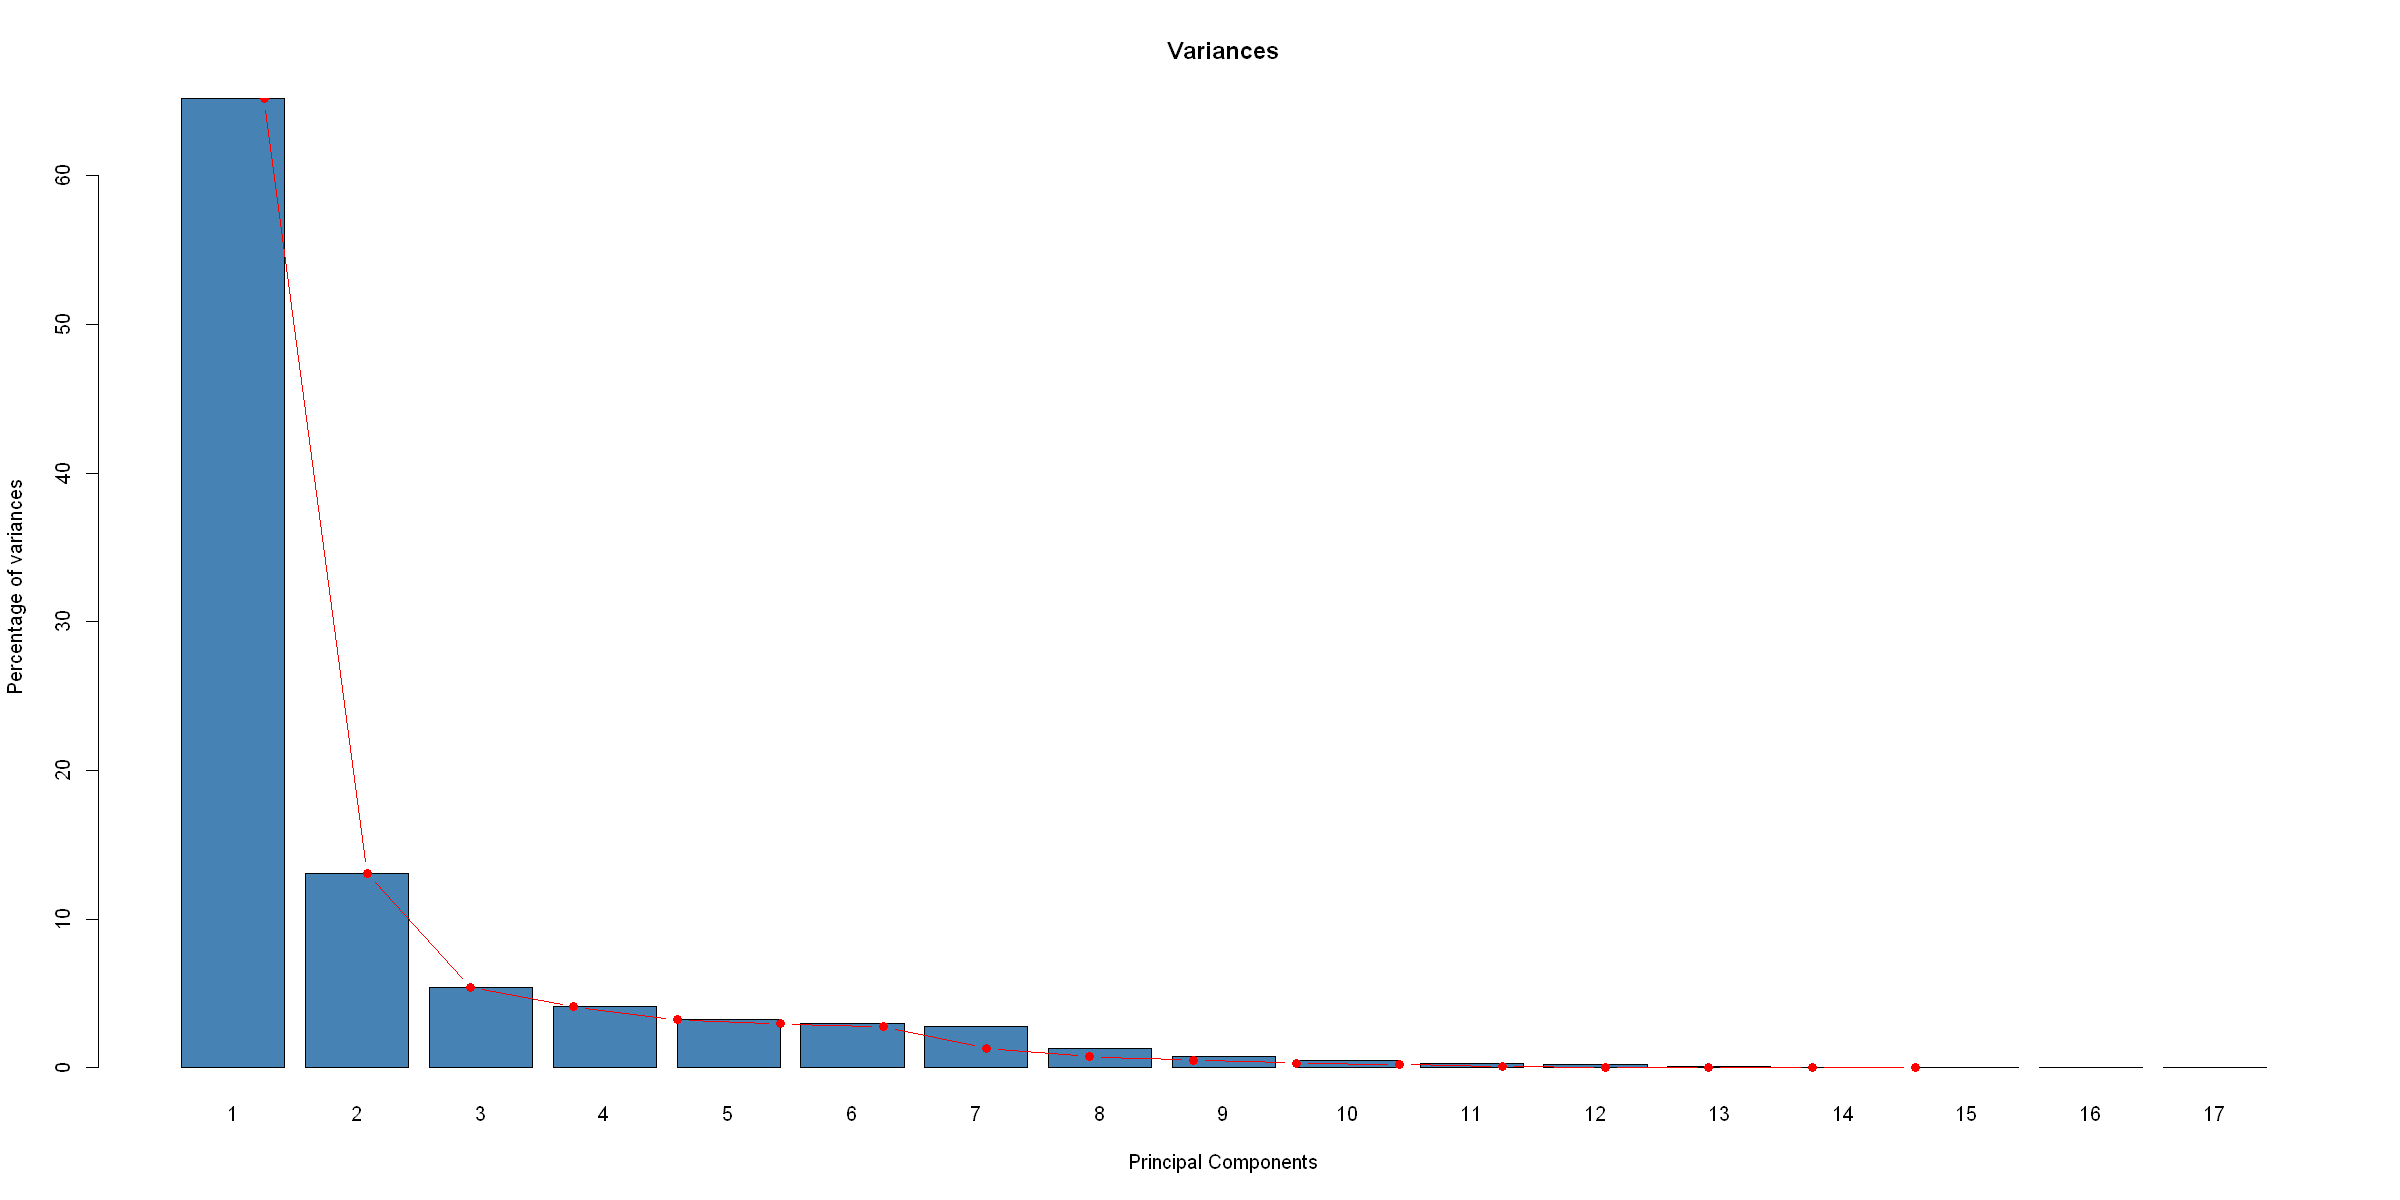

In [32]:
barplot(eig.decathlon2.active[, 2], names.arg=1:nrow(eig.decathlon2.active), 
       main = "Variances",
       xlab = "Principal Components",
       ylab = "Percentage of variances",
       col ="steelblue")
# Add connected line segments to the plot
lines(x = 1:nrow(eig.decathlon2.active), 
      eig.decathlon2.active[, 2], 
      type="b", pch=19, col = "red")

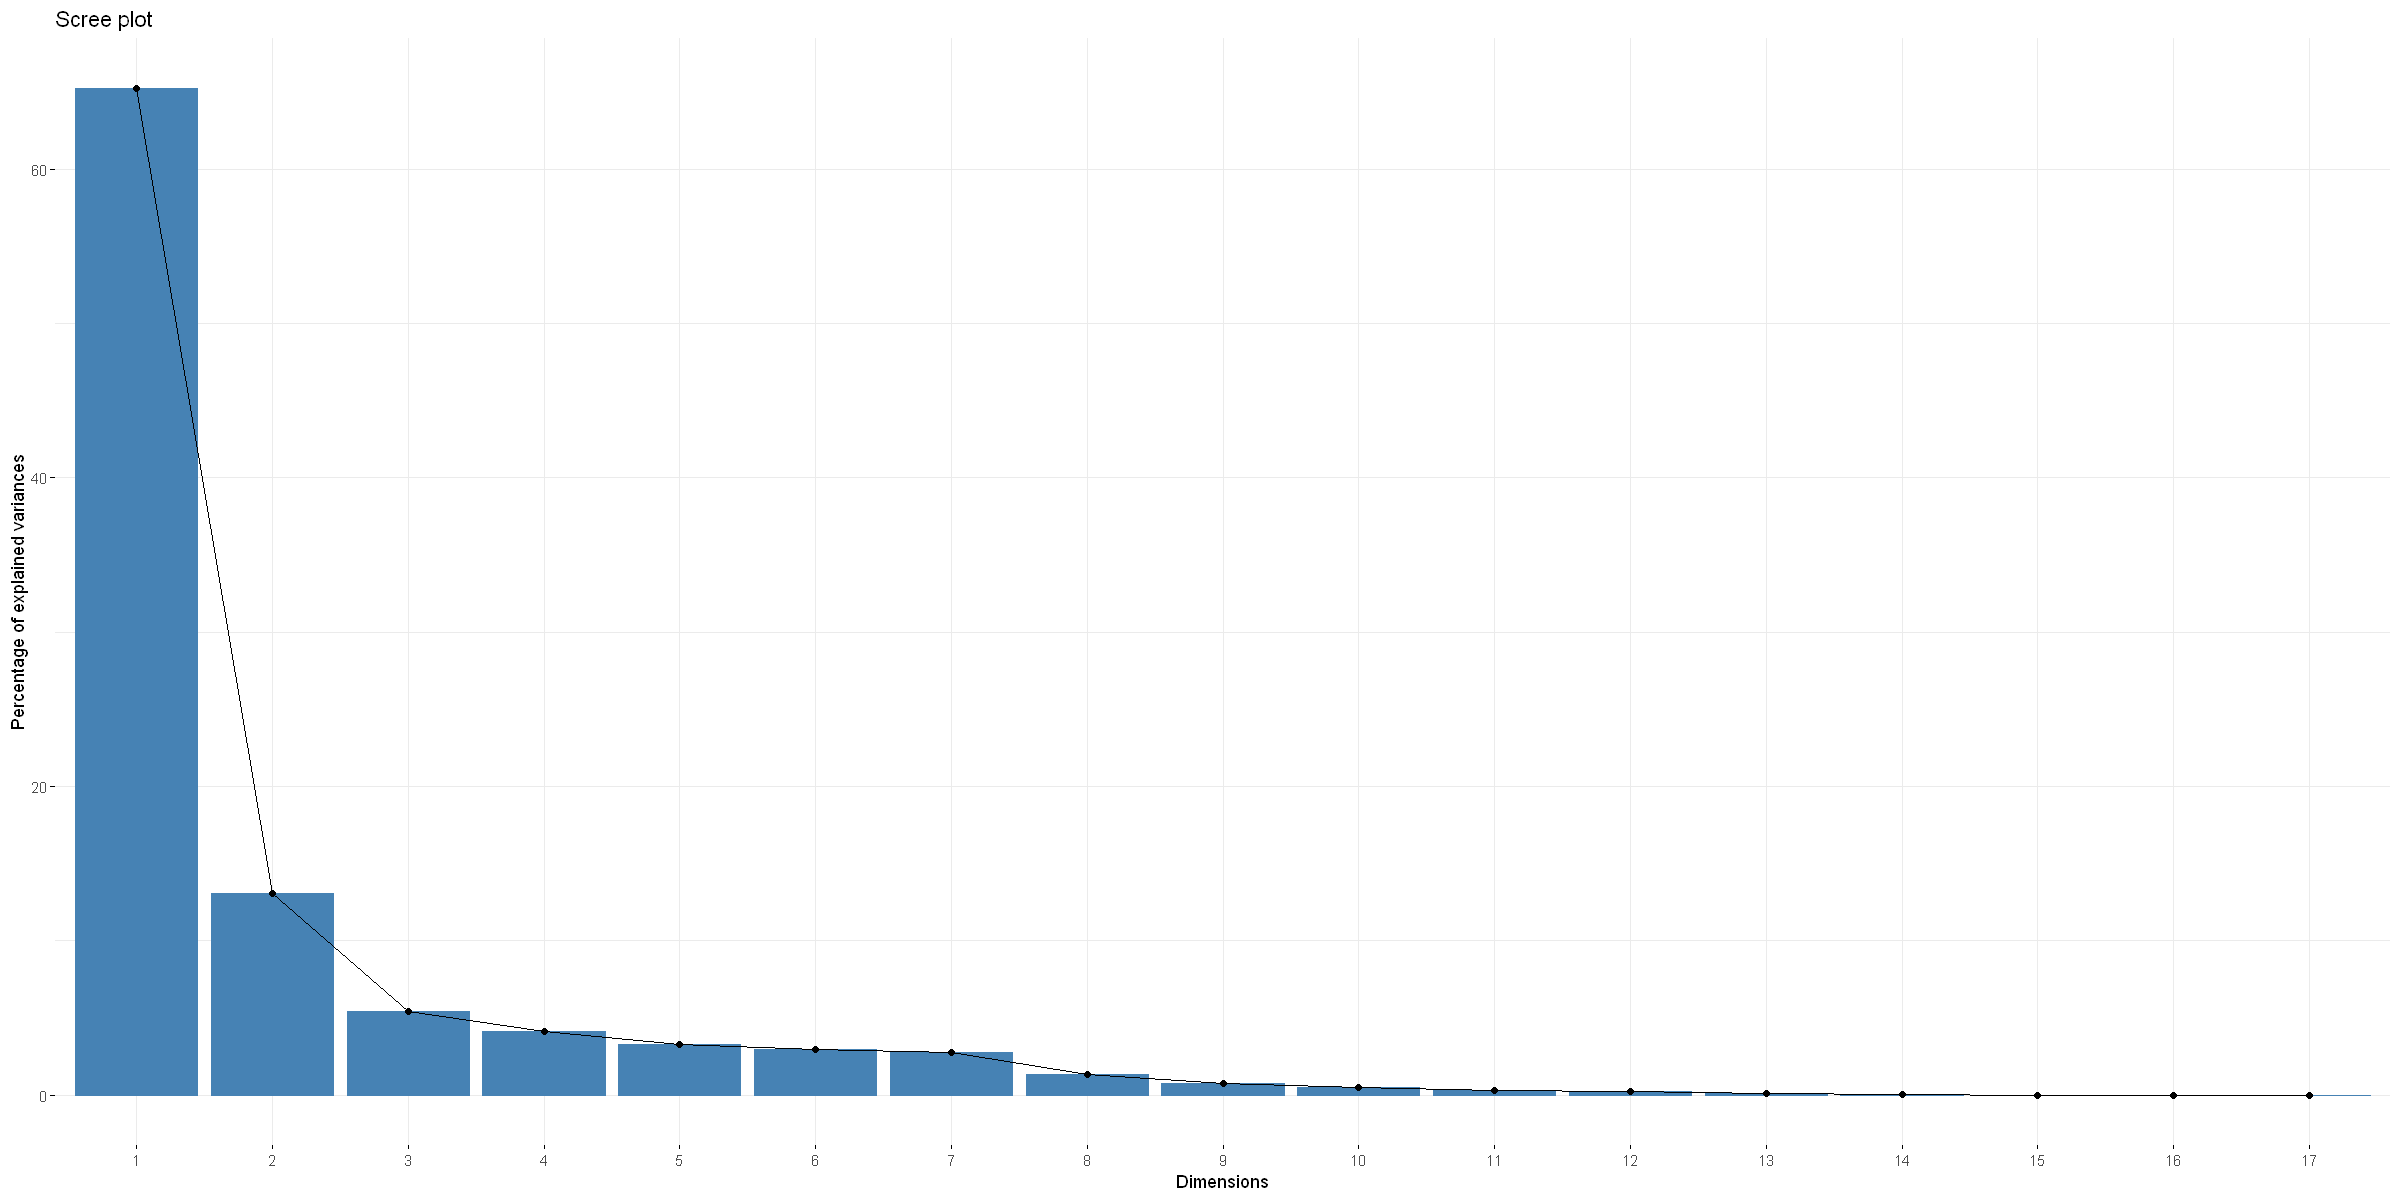

In [33]:
fviz_screeplot(res.pca, ncp=54)

In [34]:
var <- get_pca_var(res.pca)
var

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

In [35]:
var$coord


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,Dim.11,Dim.12,Dim.13,Dim.14,Dim.15,Dim.16,Dim.17
PAPI_L1_DCM,0.9326907,0.2386305436,-2.120751e-01,0.055307116,-0.039869178,0.02787446,-0.060126270,0.05418471,-0.0316983066,0.0418023680,-4.616464e-03,-7.152022e-02,0.0911006586,-1.763029e-03,7.087699e-05,-6.344430e-05,5.251592e-06
PAPI_L3_TCM,0.8564808,0.2984939092,8.231025e-05,-0.018112910,0.196867664,0.23784889,0.126690605,-0.03672004,0.2373110558,0.0388735568,-1.002327e-02,-7.571133e-02,-0.0246746478,3.868293e-03,-1.372826e-03,-6.922916e-05,3.143150e-05
PAPI_TOT_INS,0.8785427,-0.4474695202,1.829529e-02,0.033870620,0.078347218,-0.05564719,0.025490783,-0.06287428,-0.0327821524,-0.0975589586,-2.016759e-02,-8.709627e-03,0.0073733644,3.832884e-02,-3.827654e-03,-9.332933e-04,-2.288226e-05
PAPI_REF_CYC,0.8821500,0.2411775272,-5.538295e-02,-0.104744399,0.167833419,0.24524801,0.190491779,0.04347108,-0.0004575897,0.0323026857,1.837048e-02,1.454235e-01,0.0239874396,3.132469e-03,5.013723e-04,-1.729836e-04,-5.452714e-05
PAPI_L2_LDM,0.8195221,0.3733518743,-5.028735e-02,0.145062611,0.122912148,-0.02322336,-0.384315262,-0.02539329,-0.0056627685,-0.0194644373,3.422667e-05,2.008997e-02,-0.0161823369,3.756039e-03,1.494248e-02,1.078742e-02,-6.632621e-05
PAPI_SR_INS,0.9146663,-0.2909079229,9.471000e-02,0.038593922,0.026767041,-0.11494989,0.019911027,0.12639404,0.0310519767,-0.0186461904,-1.900348e-01,2.080855e-02,-0.0023147042,-1.153390e-02,-3.763598e-04,2.643367e-04,1.031839e-05
PAPI_BR_UCN,0.5886277,-0.0001395312,1.953715e-02,-0.777656487,-0.110651054,-0.07326551,-0.167287548,-0.04881433,0.0191998857,0.0032956305,-3.669345e-03,-3.699138e-03,-0.0001984506,-1.605301e-05,-2.920726e-05,1.036216e-05,-2.205554e-05
PAPI_BR_CN,0.9133358,-0.2943542245,1.402730e-01,0.016665738,0.032875432,-0.14397544,0.027758408,0.15669800,0.0469407117,-0.0502977212,8.535168e-02,-1.542597e-03,-0.0005879503,-6.763684e-03,1.230456e-03,2.645811e-04,4.040159e-03
PAPI_BR_TKN,0.9127359,-0.2955664717,1.398164e-01,0.022300190,0.031141695,-0.14467329,0.028104888,0.15675348,0.0484290808,-0.0503245308,8.532704e-02,-4.067047e-03,-0.0011336680,-7.292404e-03,4.579666e-04,7.803606e-05,-4.023289e-03
PAPI_BR_MSP,0.8701692,0.2186619639,1.861602e-01,-0.079121158,0.059152718,0.25689832,0.093512100,0.12104889,-0.2367736458,0.0122296579,-1.909073e-03,-6.076766e-02,-0.0356998220,-1.113360e-03,-4.906626e-04,1.155843e-04,8.296373e-06


Loading required package: plyr
Loading required package: scales
Loading required package: grid


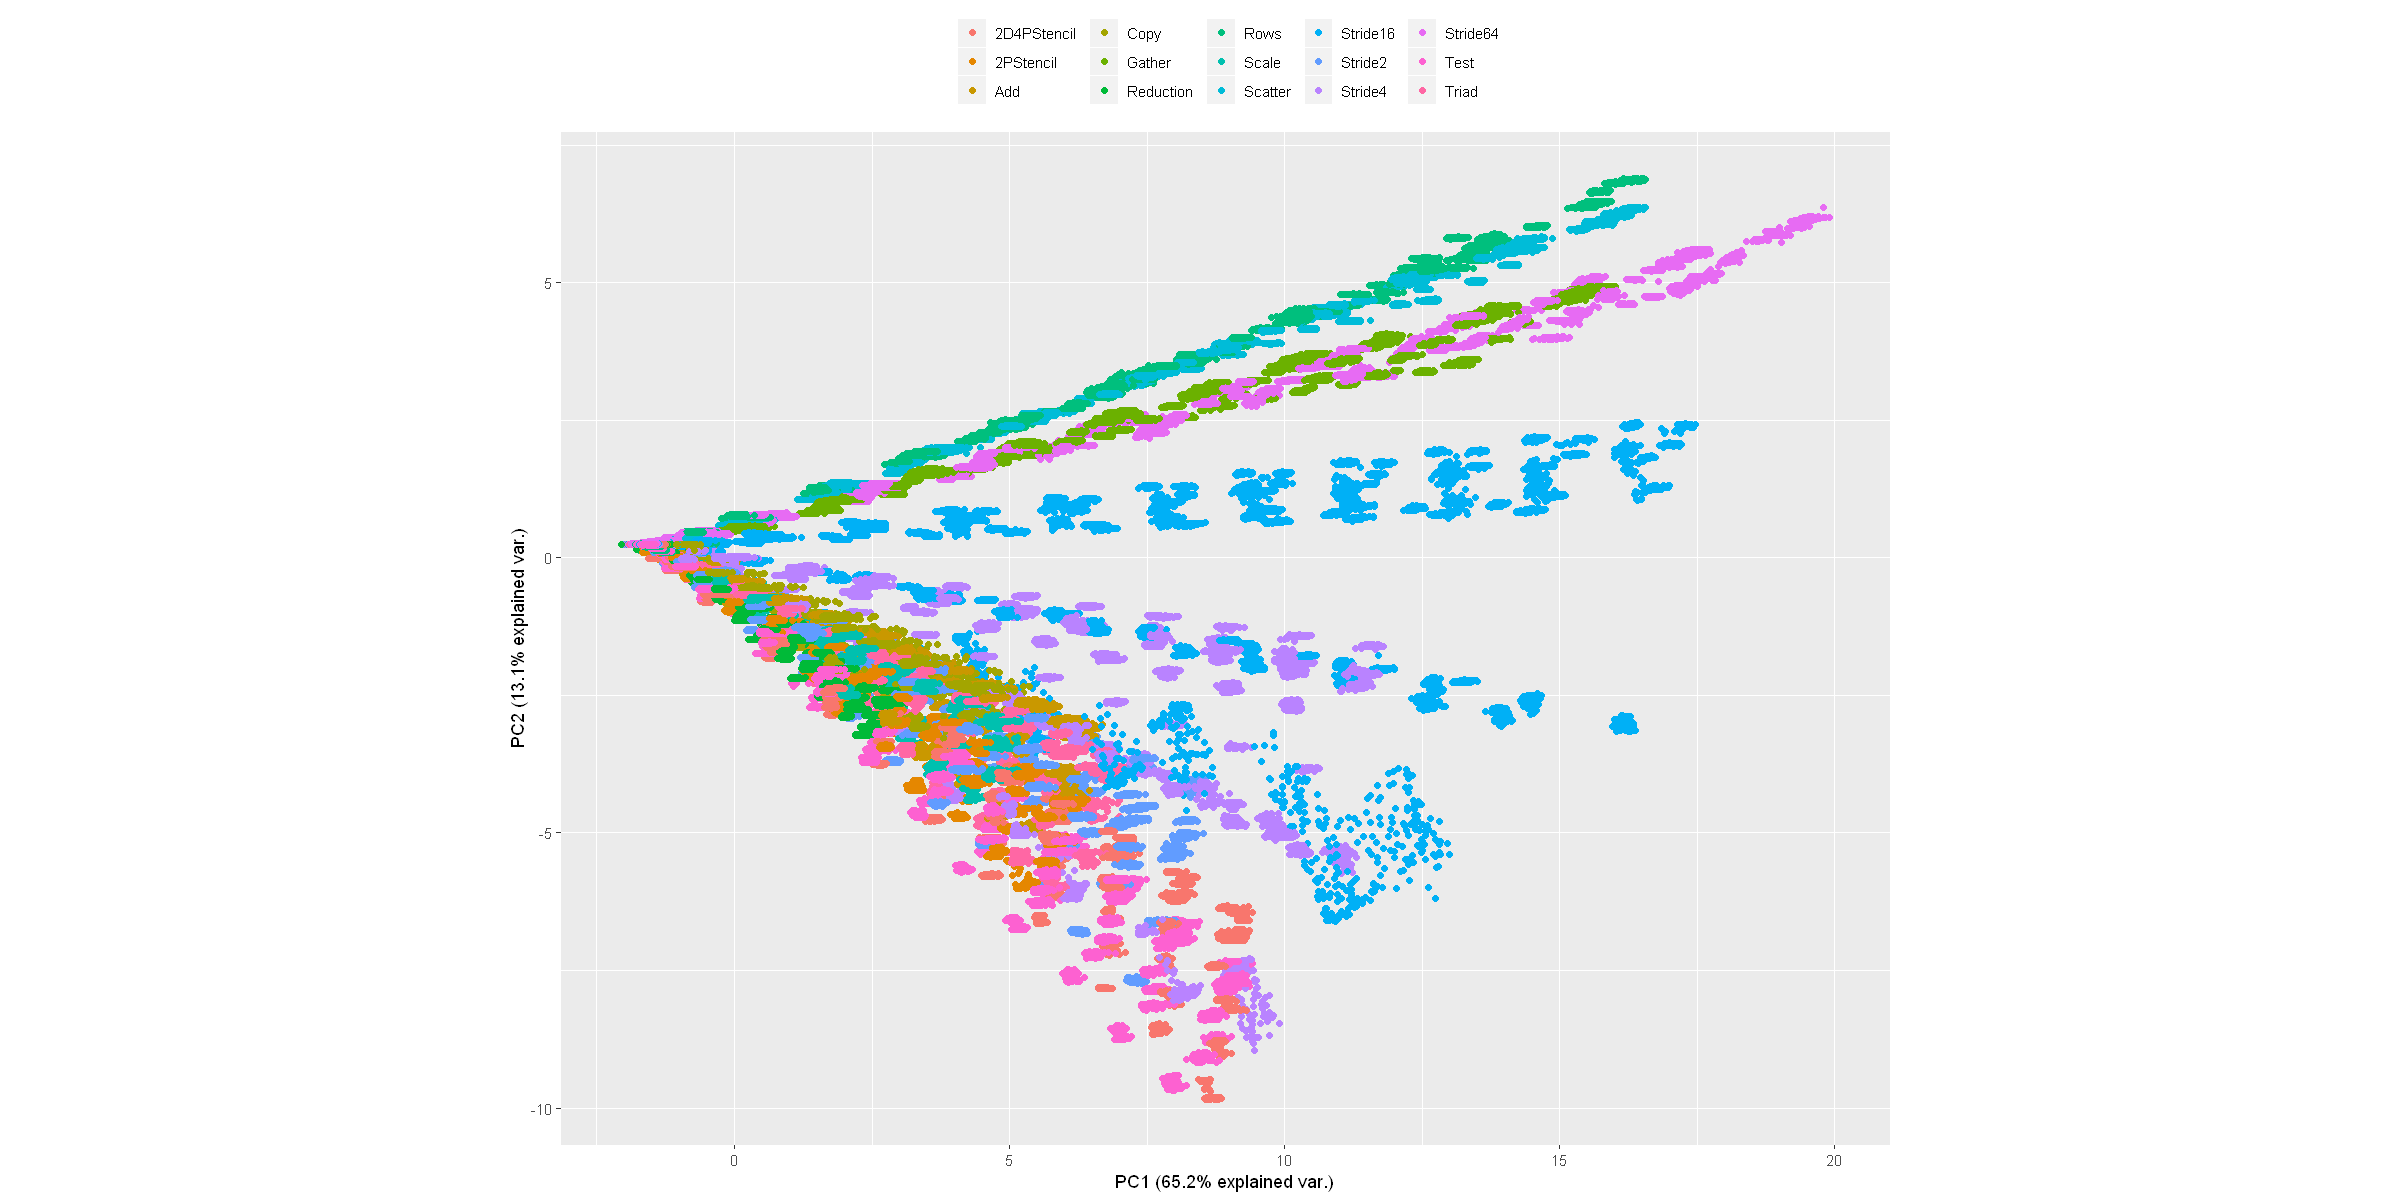

In [36]:
library(devtools)
library(ggbiplot)
g <- ggbiplot(res.pca, obs.scale = 1, var.scale = 1, groups = res.label, ellipse = FALSE, circle = TRUE, var.axes=FALSE)
#g <- ggbiplot(res.pca, obs.scale = 1, var.scale = 1, groups = {res.label, res.threads}, ellipse = FALSE, circle = TRUE, var.axes=FALSE)
g <- g + scale_color_discrete(name = '')
g <- g + theme(legend.direction = 'horizontal', legend.position = 'top')
print(g)

In [37]:
# Helper function : 
# Correlation between variables and principal components
var_cor_func <- function(var.loadings, comp.sdev){
  var.loadings*comp.sdev
  }

# Variable correlation/coordinates
loadings <- res.pca$rotation
sdev <- res.pca$sdev

var.coord <- var.cor <- t(apply(loadings, 1, var_cor_func, sdev))
print(var.coord[, 1:4])

                   PC1           PC2           PC3          PC4
PAPI_L1_DCM  0.9326907  0.2386305436 -2.120751e-01  0.055307116
PAPI_L3_TCM  0.8564808  0.2984939092  8.231025e-05 -0.018112910
PAPI_TOT_INS 0.8785427 -0.4474695202  1.829529e-02  0.033870620
PAPI_REF_CYC 0.8821500  0.2411775272 -5.538295e-02 -0.104744399
PAPI_L2_LDM  0.8195221  0.3733518743 -5.028735e-02  0.145062611
PAPI_SR_INS  0.9146663 -0.2909079229  9.471000e-02  0.038593922
PAPI_BR_UCN  0.5886277 -0.0001395312  1.953715e-02 -0.777656487
PAPI_BR_CN   0.9133358 -0.2943542245  1.402730e-01  0.016665738
PAPI_BR_TKN  0.9127359 -0.2955664717  1.398164e-01  0.022300190
PAPI_BR_MSP  0.8701692  0.2186619639  1.861602e-01 -0.079121158
PAPI_FP_OPS  0.6714452 -0.5939636681 -2.520730e-01  0.003877114
PAPI_L1_LDM  0.8775984  0.2374230301 -9.160262e-02  0.157051870
PAPI_L1_STM  0.8247576  0.3427596597 -2.926432e-01  0.041917855
PAPI_LD_INS  0.7819688 -0.4266980465  3.023451e-01  0.083030755
PAPI_L2_STM  0.7804671  0.4159679605 -2.

In [38]:
var.cos2 <- var.coord^2
print(var.cos2)

                   PC1          PC2          PC3          PC4          PC5
PAPI_L1_DCM  0.8699119 5.694454e-02 4.497586e-02 3.058877e-03 1.589551e-03
PAPI_L3_TCM  0.7335594 8.909861e-02 6.774977e-09 3.280775e-04 3.875688e-02
PAPI_TOT_INS 0.7718372 2.002290e-01 3.347177e-04 1.147219e-03 6.138287e-03
PAPI_REF_CYC 0.7781886 5.816660e-02 3.067271e-03 1.097139e-02 2.816806e-02
PAPI_L2_LDM  0.6716165 1.393916e-01 2.528818e-03 2.104316e-02 1.510740e-02
PAPI_SR_INS  0.8366145 8.462742e-02 8.969984e-03 1.489491e-03 7.164745e-04
PAPI_BR_UCN  0.3464825 1.946894e-08 3.817004e-04 6.047496e-01 1.224366e-02
PAPI_BR_CN   0.8341822 8.664441e-02 1.967651e-02 2.777468e-04 1.080794e-03
PAPI_BR_TKN  0.8330868 8.735954e-02 1.954862e-02 4.972985e-04 9.698052e-04
PAPI_BR_MSP  0.7571944 4.781305e-02 3.465563e-02 6.260158e-03 3.499044e-03
PAPI_FP_OPS  0.4508386 3.527928e-01 6.354078e-02 1.503201e-05 2.634238e-02
PAPI_L1_LDM  0.7701789 5.636970e-02 8.391039e-03 2.466529e-02 8.790811e-05
PAPI_L1_STM  0.6802251 1.

In [39]:
comp.cos2 <- apply(var.cos2, 2, sum)

contrib <- function(var.cos2, comp.cos2){var.cos2*100/comp.cos2}

var.contrib <- t(apply(var.cos2,1, contrib, comp.cos2))
print(var.contrib)

                  PC1          PC2          PC3          PC4         PC5
PAPI_L1_DCM  7.847705 2.560790e+00 4.890113e+00  0.435705383  0.28731365
PAPI_L3_TCM  6.617633 4.006756e+00 7.366264e-07  0.046731246  7.00536020
PAPI_TOT_INS 6.962947 9.004277e+00 3.639302e-02  0.163409461  1.10950394
PAPI_REF_CYC 7.020245 2.615746e+00 3.334967e-01  1.562760818  5.09141597
PAPI_L2_LDM  6.058829 6.268427e+00 2.749521e-01  2.997380488  2.73068316
PAPI_SR_INS  7.547320 3.805687e+00 9.752840e-01  0.212162546  0.12950377
PAPI_BR_UCN  3.125710 8.755164e-07 4.150133e-02 86.140322990  2.21305806
PAPI_BR_CN   7.525378 3.896390e+00 2.139378e+00  0.039562160  0.19535504
PAPI_BR_TKN  7.515496 3.928550e+00 2.125473e+00  0.070835024  0.17529365
PAPI_BR_MSP  6.830850 2.150148e+00 3.768020e+00  0.891694667  0.63245715
PAPI_FP_OPS  4.067134 1.586506e+01 6.908631e+00  0.002141155  4.76142180
PAPI_L1_LDM  6.947987 2.534940e+00 9.123368e-01  3.513315242  0.01588952
PAPI_L1_STM  6.136490 5.283252e+00 9.311429e+00  0.

In [40]:
print(sort(var.contrib[,'PC1'],decreasing=TRUE))

 PAPI_L1_DCM  PAPI_SR_INS   PAPI_BR_CN  PAPI_BR_TKN PAPI_REF_CYC PAPI_TOT_INS 
    7.847705     7.547320     7.525378     7.515496     7.020245     6.962947 
 PAPI_L1_LDM  PAPI_BR_MSP  PAPI_L3_TCM  PAPI_L1_STM  PAPI_L2_LDM  PAPI_LD_INS 
    6.947987     6.830850     6.617633     6.136490     6.058829     5.516280 
 PAPI_L2_STM  PAPI_FP_OPS  PAPI_BR_UCN  PAPI_L2_DCH  PAPI_TLB_DM 
    5.495112     4.067134     3.125710     2.442977     2.341908 


In [41]:
print(sort(var.contrib[,'PC2'],decreasing=TRUE))

 PAPI_FP_OPS  PAPI_L2_DCH PAPI_TOT_INS  PAPI_LD_INS  PAPI_TLB_DM  PAPI_L2_STM 
1.586506e+01 1.393981e+01 9.004277e+00 8.187725e+00 8.171326e+00 7.781112e+00 
 PAPI_L2_LDM  PAPI_L1_STM  PAPI_L3_TCM  PAPI_BR_TKN   PAPI_BR_CN  PAPI_SR_INS 
6.268427e+00 5.283252e+00 4.006756e+00 3.928550e+00 3.896390e+00 3.805687e+00 
PAPI_REF_CYC  PAPI_L1_DCM  PAPI_L1_LDM  PAPI_BR_MSP  PAPI_BR_UCN 
2.615746e+00 2.560790e+00 2.534940e+00 2.150148e+00 8.755164e-07 


In [42]:
print(sort(var.contrib[,'PC3'],decreasing=TRUE))

 PAPI_TLB_DM  PAPI_LD_INS  PAPI_L1_STM  PAPI_L2_STM  PAPI_FP_OPS  PAPI_L1_DCM 
4.570025e+01 9.939059e+00 9.311429e+00 8.848778e+00 6.908631e+00 4.890113e+00 
 PAPI_L2_DCH  PAPI_BR_MSP   PAPI_BR_CN  PAPI_BR_TKN  PAPI_SR_INS  PAPI_L1_LDM 
3.794899e+00 3.768020e+00 2.139378e+00 2.125473e+00 9.752840e-01 9.123368e-01 
PAPI_REF_CYC  PAPI_L2_LDM  PAPI_BR_UCN PAPI_TOT_INS  PAPI_L3_TCM 
3.334967e-01 2.749521e-01 4.150133e-02 3.639302e-02 7.366264e-07 


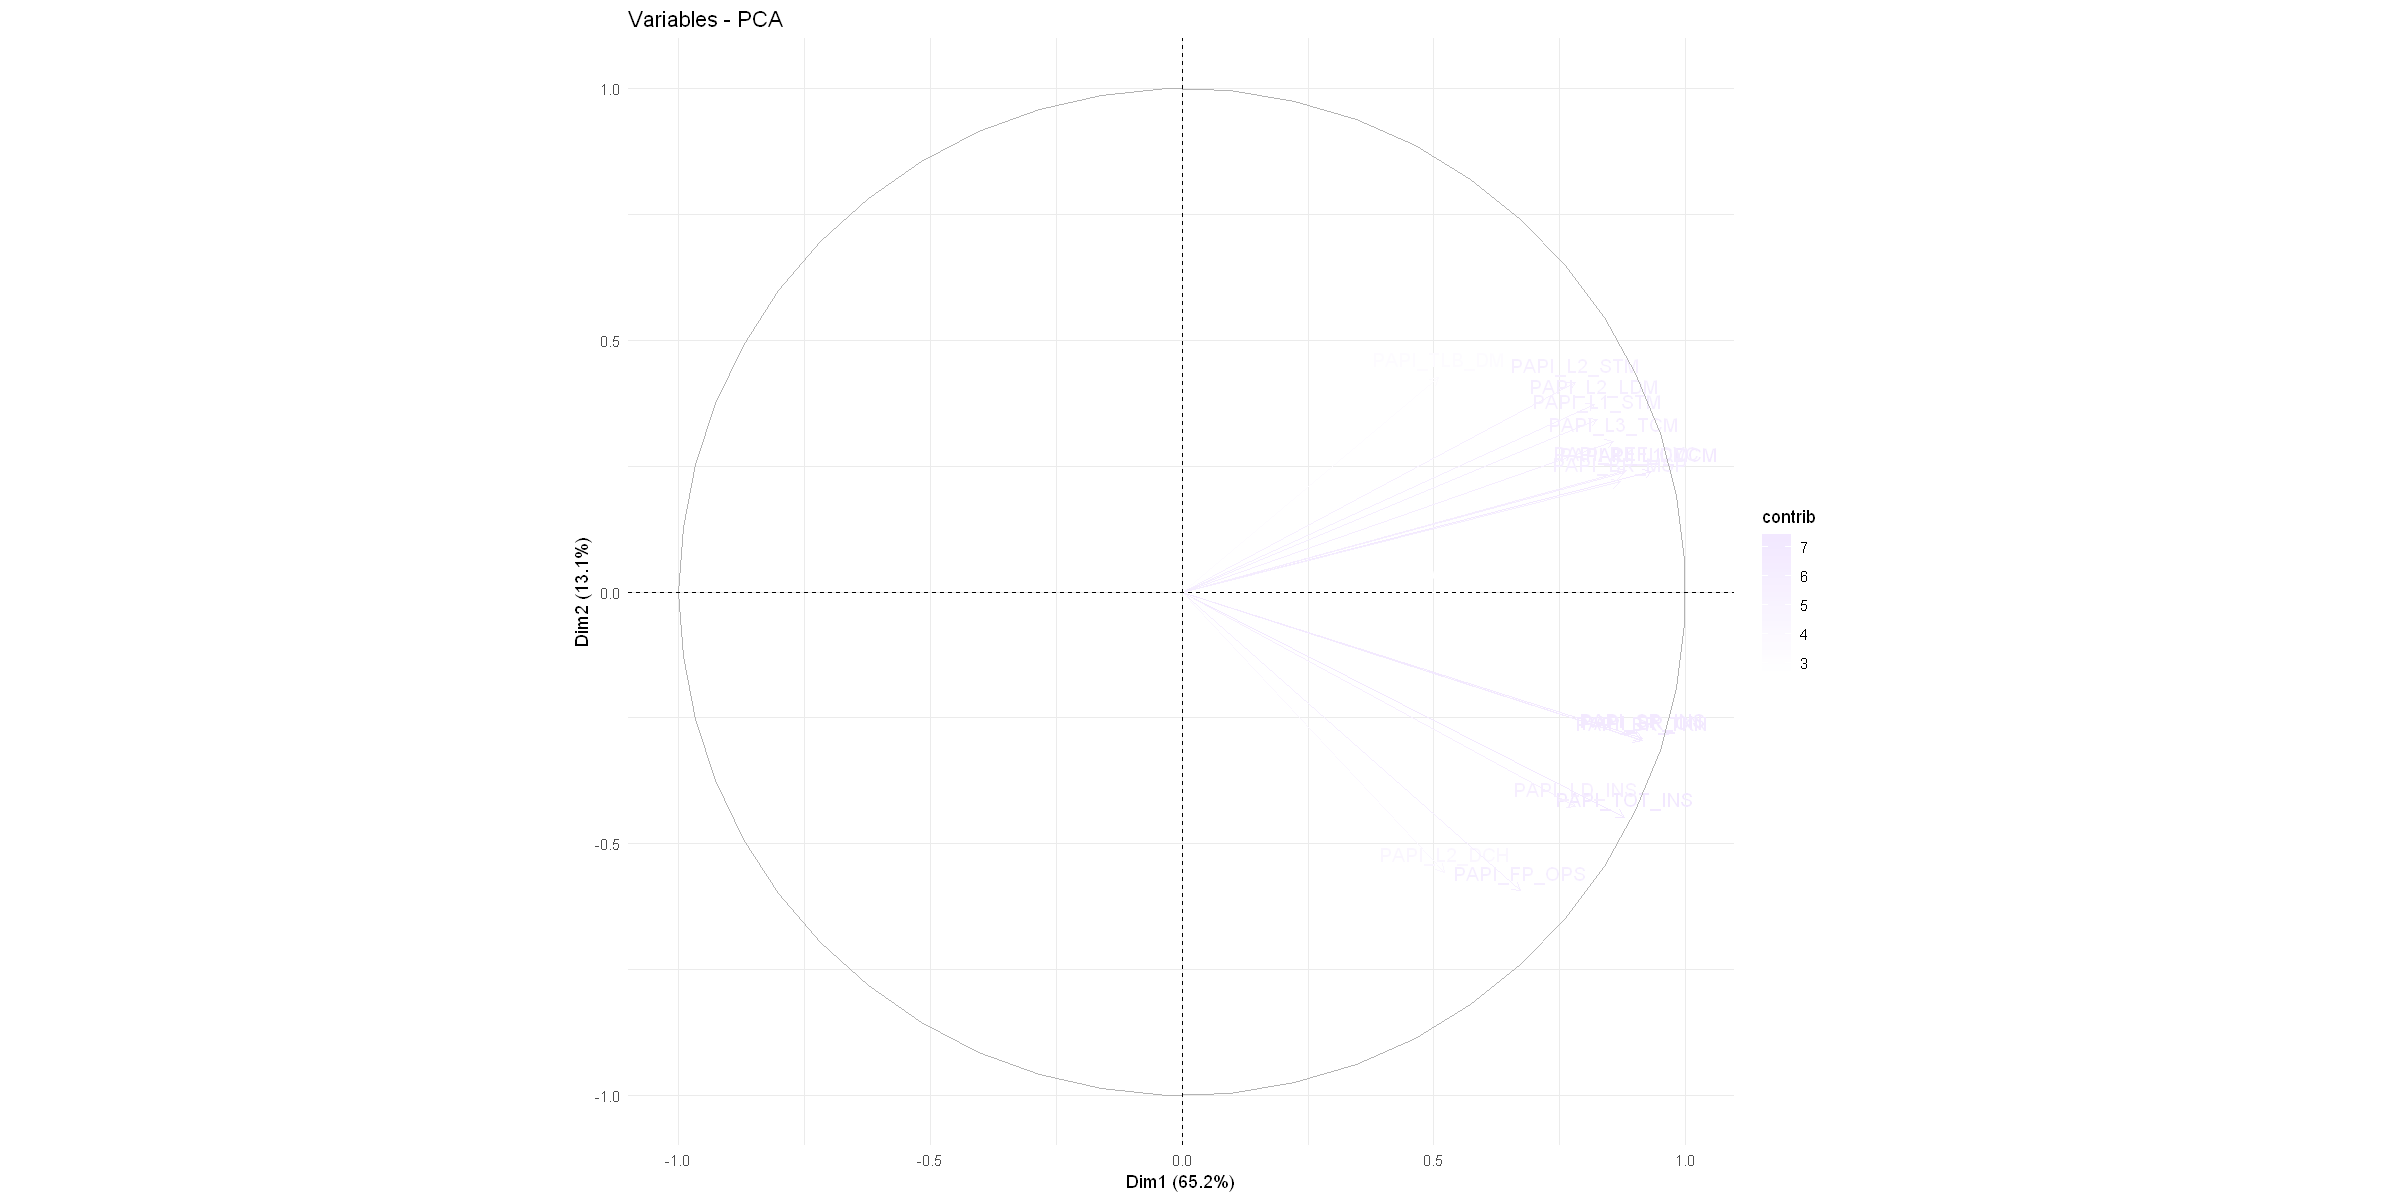

In [43]:
fviz_pca_var(res.pca, col.var="contrib") + scale_color_gradient2(low="white", mid="blue", high="red", midpoint=50) + theme_minimal()

In [44]:
new_mydata1 = mydata[,5:61]
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_TOT_CYC))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_TLB_DM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_FP_INS))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCW))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_DCW))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_TCA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_DCA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_TCW))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_DCW))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_DCA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_TCR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_DCR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_DCR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_DCM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_BR_INS))

new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_ICA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_ICH))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_ICM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_ICR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_ICA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_ICH))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_ICM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_ICR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_ICA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_ICR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_TCM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCH))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_TLB_IM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_RES_STL))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_BR_PRC))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_BR_MSP))




new_mydata1 <- subset(new_mydata1, select = -c(PAPI_VEC_DP))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_VEC_SP))

my_data_ordered1 <- new_mydata1[,order(colnames(new_mydata1))]


options(repr.matrix.max.rows = 100)
options(repr.matrix.max.cols = 100)
res1 <- cor(my_data_ordered1)
dim(res1)
round(res1, 2)

ERROR: Error in `[.data.frame`(mydata, , 5:61): undefined columns selected


In [ ]:
library(corrplot)


corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "AOE", number.cex = 0.5)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=2)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=3)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=4)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=5)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=6)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=7)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=8)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=9)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=10)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=11)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=12)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=13)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=14)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=15)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=16)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=17)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "FPC", number.cex = 0.5)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "alphabet", number.cex = 0.5)